In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA


DF=pd.read_csv("CC GENERAL.csv")

In [49]:
DF.head(20)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [50]:
DF.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [51]:
DF.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [52]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [53]:
DF["MINIMUM_PAYMENTS"].fillna(DF["MINIMUM_PAYMENTS"].mean(),inplace=True)
DF["CREDIT_LIMIT"].fillna(DF["CREDIT_LIMIT"].mean(),inplace=True)

In [54]:
DF.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [55]:
DF=DF.drop('CUST_ID',axis=1)

In [57]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(DF) #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
DF['Agglo_clusters_labels'] = clust_labels

In [56]:
DF.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [58]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [59]:
DF['Agglo_clusters_labels'].value_counts()

0    8920
2      20
1       7
4       2
3       1
Name: Agglo_clusters_labels, dtype: int64

In [85]:
#scalling and normalizing the data
from scipy.stats import zscore

DF_scaled=DF.apply(zscore)
DF_scaled=normalize(DF_scaled)
DFp = pd.DataFrame(DF_scaled, columns=DF.columns)

In [86]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(DFp) #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
DFp['Agglo_clusters_labels'] = clust_labels

In [87]:
agglomerative=pd.DataFrame(clust_labels)
DFp['Agglo_clusters_labels'].value_counts()

4    2891
3    1891
2    1626
0    1431
1    1111
Name: Agglo_clusters_labels, dtype: int64

C:\Users\Best Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

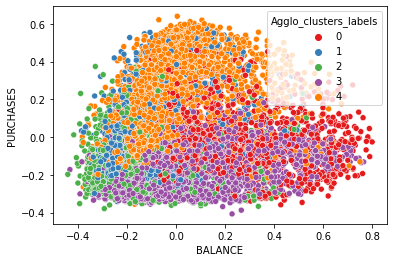

In [88]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(DFp['BALANCE'],DFp['PURCHASES'],hue=DFp['Agglo_clusters_labels'],palette='Set1')


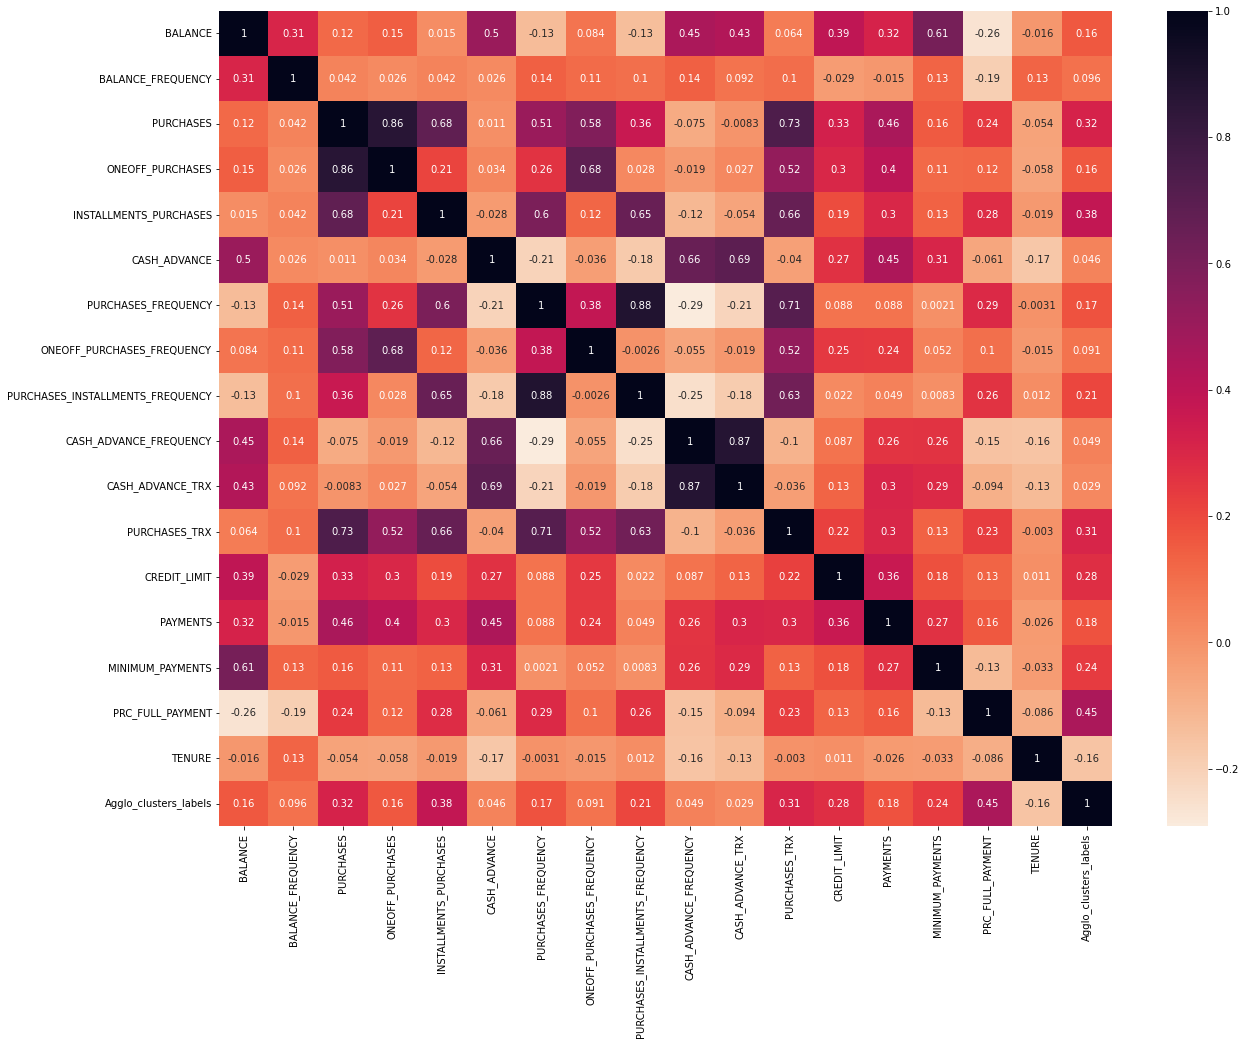

In [89]:
plt.figure(figsize=(20, 15))
correlations = DF.corr()
sns.heatmap(correlations, cmap="rocket_r", annot=True)
plt.show()

C:\Users\Best Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='ONEOFF_PURCHASES'>

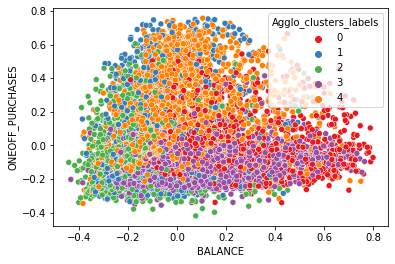

In [90]:
import seaborn as sns 
sns.set_palette('Set2')
sns.scatterplot(DFp['BALANCE'],DFp['ONEOFF_PURCHASES'],hue=DFp['Agglo_clusters_labels'],palette='Set1')

In [114]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(DFp, method="complete"))

Error in callback <function flush_figures at 0x000001B0E1A93940> (for post_execute):


KeyboardInterrupt: 

In [96]:
from sklearn.cluster import KMeans #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(DFp)

KMeans(n_clusters=5, random_state=0)

In [112]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,2
2,4
3,1
4,1
...,...
8945,0
8946,0
8947,0
8948,3


In [127]:
kmeans.predict(DFp)
print(kmeans.cluster_centers_) #Printing the coordinates of cluster centers.

[[ 8.50343151e-02  9.73362934e-02 -4.86297707e-03  7.35968161e-03
  -2.00376759e-02  7.09276832e-02  9.15923766e-02  4.06016491e-02
   6.15688557e-02  5.74616895e-02  8.17618003e-02  2.47796268e-02
  -2.92030266e-03  4.08737158e-02  9.99944609e-02 -4.97826417e-02
   5.66959486e-02  4.37057435e-01  2.87411487e+00]
 [-4.30527225e-02 -1.67904811e-02  1.81154876e-01  1.12294770e-01
   1.85746179e-01 -6.85662162e-02  1.49463351e-01  8.96231585e-02
   1.40573380e-01 -8.54538737e-02 -7.58828370e-02  1.79400035e-01
   8.71379689e-02  6.74340949e-02 -2.75194916e-02  1.81119439e-01
  -3.71657089e-02  4.00000000e+00 -3.10862447e-15]
 [-3.63775718e-02 -6.21628437e-02 -1.74073445e-01 -1.20434430e-01
  -1.60377541e-01 -2.14401351e-03 -2.08980101e-01 -1.17505721e-01
  -1.75914036e-01  2.97112971e-02 -3.39227782e-04 -1.89287416e-01
  -8.33485972e-02 -1.05437629e-01 -7.03375905e-02 -1.18315390e-01
  -9.91870510e-03  2.53767415e+00  2.07534831e+00]]


In [128]:
DFp['k_means_labels']=labels
DFp['k_means_labels'].value_counts()

0    2891
3    1891
1    1626
2    1431
4    1111
Name: k_means_labels, dtype: int64

C:\Users\Best Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

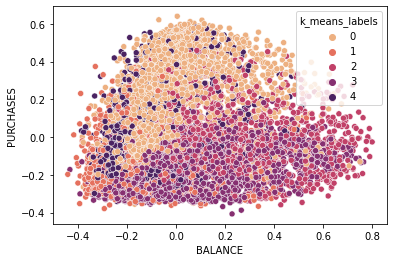

In [129]:

import seaborn as sns 
sns.set_palette("flare")
sns.scatterplot(DFp['BALANCE'],DFp['PURCHASES'],hue=DFp['k_means_labels'],palette="flare")



In [115]:
sse = []
K=range(1,15)
for i in K:
    km=KMeans(n_clusters=i)
    km=km.fit(DFp)
    sse.append(km.inertia_)   

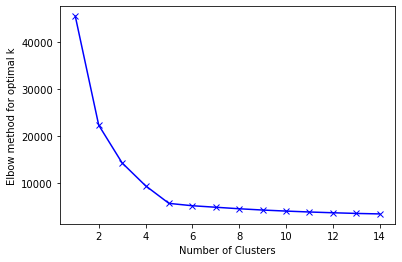

In [116]:
plt.figure()
plt.plot(K,sse, 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum-of-Squares")
plt.ylabel("Elbow method for optimal k")
plt.show()

In [118]:
kmeans=KMeans(n_clusters=3, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(DFp)

KMeans(n_clusters=3, random_state=0)

In [119]:
label=pd.DataFrame(kmeans.labels_)
DFp['k_means_labels']=label
DFp['k_means_labels'].value_counts()

2    3517
1    2891
0    2542
Name: k_means_labels, dtype: int64

C:\Users\Best Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

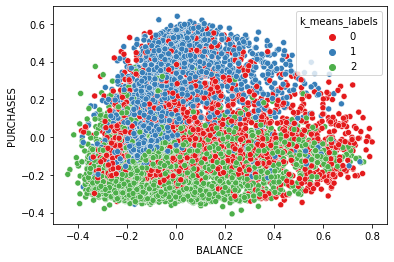

In [126]:
import seaborn as sns 
sns.set_palette('Set1')
sns.scatterplot(DFp['BALANCE'],DFp['PURCHASES'],hue=DFp['k_means_labels'],palette='Set1')